In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


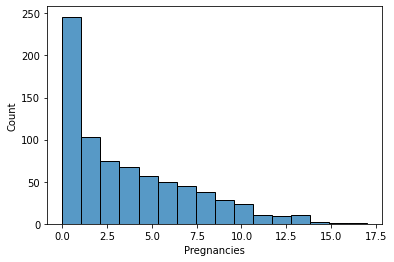

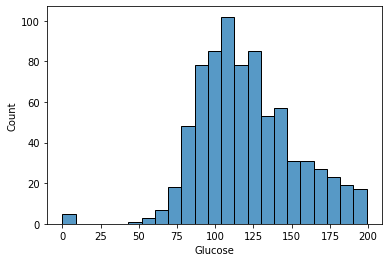

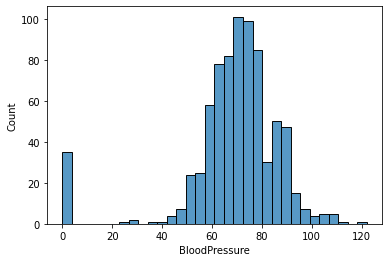

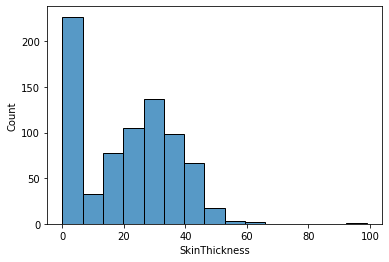

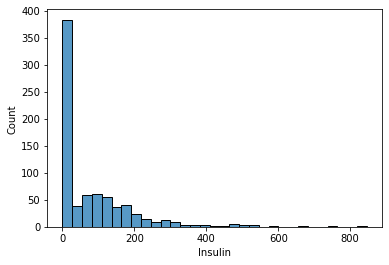

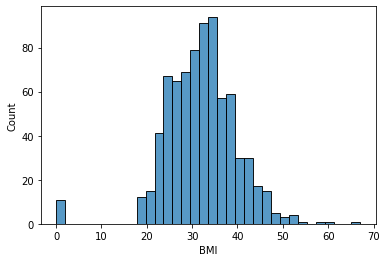

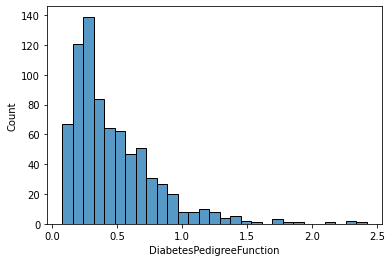

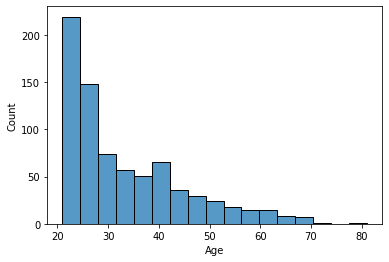

In [ ]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in features:
  sns.histplot(df[i])
  plt.show()

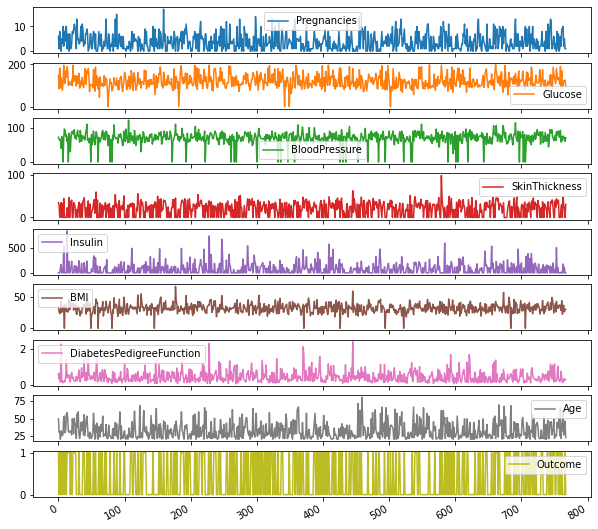

In [ ]:
df.plot(subplots=True, figsize=(10, 10))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = df[df.columns[0:8]]
Y = df[df.columns[8]]

In [ ]:
from sklearn.preprocessing import StandardScaler
q = StandardScaler().fit_transform(X)
X_s = pd.DataFrame(q,columns=features)
X_s

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(X_s,Y,test_size=0.1,train_size=0.9)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.22,train_size =0.78)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
n_neighbors = [3,5,7,10]

In [ ]:
from sklearn.model_selection import cross_val_score
for i in n_neighbors:
  clf = KNeighborsClassifier(n_neighbors=i,algorithm='auto')
  scores = cross_val_score(clf, x_cv, y_cv, cv=5)
  print("cross validation score for",i,":",scores.mean())

cross validation score for 3 : 0.804516129032258
cross validation score for 5 : 0.8172043010752688
cross validation score for 7 : 0.7976344086021505
cross validation score for 10 : 0.7845161290322581


In [ ]:
#when n_neighbors=3
clf = KNeighborsClassifier(n_neighbors=3,algorithm='auto')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7142857142857143
F1 score: 0.5416666666666666
confusion matrix -
[[42  8]
 [14 13]]


In [ ]:
#when n_neighbors=5
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7142857142857143
F1 score: 0.5217391304347826
confusion matrix -
[[43  7]
 [15 12]]


In [ ]:
#when n_neighbors=7
clf = KNeighborsClassifier(n_neighbors=7,algorithm='auto')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.6883116883116883
F1 score: 0.5
confusion matrix -
[[41  9]
 [15 12]]


In [ ]:
#when n_neighbors=10
clf = KNeighborsClassifier(n_neighbors=10,algorithm='auto')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7012987012987013
F1 score: 0.41025641025641024
confusion matrix -
[[46  4]
 [19  8]]


In [ ]:
#grid search for best parameters
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,10,15],'algorithm': ['auto','ball_tree','kd_tree','brute']} 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
grid.fit(x_train,y_train)


In [ ]:
print(grid.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


In [ ]:
#knn on best paramters
clf_ = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=15, p=2, weights='uniform')
clf_.fit(x_train,y_train)
y_pred = clf_.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7402597402597403
F1 score: 0.5833333333333334
confusion matrix -
[[43  7]
 [13 14]]


MLP


In [ ]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [50,100,150,200]

In [ ]:
for i in hidden_layer_sizes:
  clf = MLPClassifier(hidden_layer_sizes=i,activation='relu',max_iter=10000)
  scores = cross_val_score(clf, x_cv, y_cv, cv=5)
  print("cross validation score for",i,":",scores.mean())

cross validation score for 50 : 0.7911827956989248
cross validation score for 100 : 0.7782795698924733
cross validation score for 150 : 0.7976344086021505
cross validation score for 200 : 0.778279569892473


In [ ]:
#when hidden layer size = 50
clf = MLPClassifier(hidden_layer_sizes=50, max_iter=10000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7142857142857143
F1 score: 0.576923076923077
confusion matrix -
[[40 10]
 [12 15]]


In [ ]:
#when hidden layer size = 100
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=10000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.6623376623376623
F1 score: 0.4583333333333333
confusion matrix -
[[40 10]
 [16 11]]


In [ ]:
#when hidden layer size = 150
clf = MLPClassifier(hidden_layer_sizes=150, max_iter=10000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7012987012987013
F1 score: 0.5306122448979591
confusion matrix -
[[41  9]
 [14 13]]


In [ ]:
#when hidden layer size = 200
clf = MLPClassifier(hidden_layer_sizes=200, max_iter=10000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7012987012987013
F1 score: 0.5818181818181818
confusion matrix -
[[38 12]
 [11 16]]


In [ ]:
#grid search for best parameters

clf = MLPClassifier()
param_grid = {'hidden_layer_sizes': [50,100,150,200,250]} 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
grid.fit(x_train,y_train)


In [ ]:
print(grid.best_estimator_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7142857142857143
F1 score: 0.5925925925925926
confusion matrix -
[[39 11]
 [11 16]]


In [ ]:
clf = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 64,
                    learning_rate_init = 0.001,
                    random_state=2)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7142857142857143
F1 score: 0.5925925925925926
confusion matrix -
[[39 11]
 [11 16]]


Boosting 

In [ ]:
from lightgbm import LGBMClassifier
model_ = LGBMClassifier(n_estimators=100,num_leaves=35,learning_rate=0.1,max_bin=255,max_depth=-1)
model_.fit(x_train,y_train)
pred_lgm=model_.predict(x_test)
x_lgm=accuracy_score(y_test,pred_lgm)
print(f'Accuracy: {x_lgm}')

Accuracy: 0.7402597402597403


In [ ]:
from sklearn.ensemble import BaggingClassifier
clf_2 = BaggingClassifier(base_estimator= LGBMClassifier(), n_estimators=200).fit(x_train,y_train)
pred_bag_=clf_2.predict(x_test)
x_bag_=accuracy_score(y_test,pred_bag_)
print(f'the accuracy score is {x_bag_}')

the accuracy score is 0.7532467532467533


SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7532467532467533
F1 score: 0.6122448979591836
confusion matrix -
[[43  7]
 [12 15]]


In [ ]:
from sklearn.svm import NuSVC
clf = NuSVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7272727272727273
F1 score: 0.5714285714285714
confusion matrix -
[[42  8]
 [13 14]]


Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty="l2", class_weight="balanced", solver="saga", max_iter=5000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.7532467532467533
F1 score: 0.6885245901639345
confusion matrix -
[[37 13]
 [ 6 21]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=150,n_estimators=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("confusion matrix -")
print( confusion_matrix(y_test,y_pred))

Accuracy: 0.8181818181818182
F1 score: 0.7407407407407407
confusion matrix -
[[43  7]
 [ 7 20]]
